Workflow

In [34]:
what_were_covering = {1: "data (prepare and load)",
                    2: "build model",
                    3: "fitting the model to data (training)",
                    4: "making the predictions and evaluating a model (inference)",
                    5: "saving and loading a model",
                    6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making the predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [35]:
import torch
from torch import nn # conatins all of PyTorch's building blocks for neural networks#
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cpu'

## 1. Data (Preparing and loading)

Machine learning is a game of two parts: 
1. Turn your data, whatever it is, into numbers (a representation).
2. Pick or build a model to learn the representation as best as possible.

# Linear regression example with *known* parameters

In [36]:

#Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets 

In [38]:
# Create a train/test script split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [39]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [40]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data = X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    
    Plots training data, test data and compares predictions.

    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot testing data in blue
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size":14});


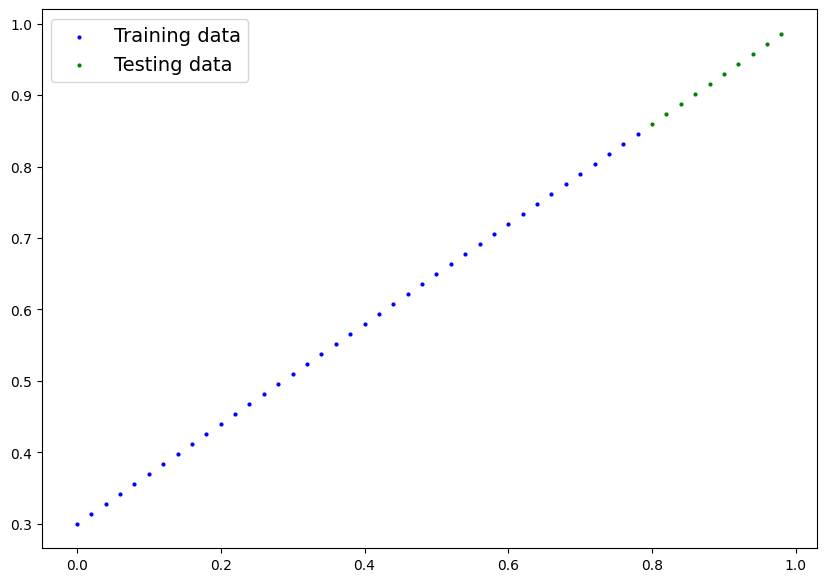

In [41]:
plot_predictions();

## 2. Build model

In [42]:
from torch import nn

class LinearRegressionModel(nn.Module): # <- almost everything in pytorch comes from nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias =  nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        
# Forward method to define the xomputation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" ist the input data
        return self.weights * x + self.bias # linear regression formula


In [51]:
# RAndom Seed
torch.manual_seed(69)

#instance of the Model

model_0 = LinearRegressionModel()

#Chack out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([-0.5259], requires_grad=True),
 Parameter containing:
 tensor([-2.6043], requires_grad=True)]

In [52]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.5259])), ('bias', tensor([-2.6043]))])

In [53]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[-3.0250],
        [-3.0355],
        [-3.0460],
        [-3.0565],
        [-3.0671],
        [-3.0776],
        [-3.0881],
        [-3.0986],
        [-3.1091],
        [-3.1196]])

In [54]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

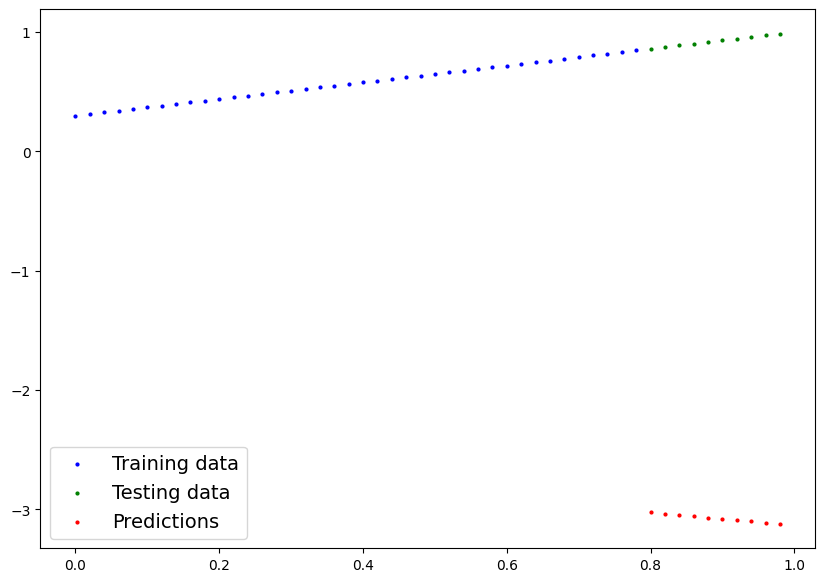

In [55]:
plot_predictions(predictions = y_preds)